In [2]:
#Import all the basic stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Import data - x4 main scenarios 
df_ploz = pd.read_csv('/home/paula/data_ext4/Dropbox/COVID/simulated-data/resurgence/outbreak_poisson_lambda_oz.csv')
df_pluk = pd.read_csv('/home/paula/data_ext4/Dropbox/COVID/simulated-data/resurgence/outbreak_poisson_lambda_uk.csv')
df_cloz = pd.read_csv('/home/paula/data_ext4/Dropbox/COVID/simulated-data/resurgence/outbreak_cluster_size_oz.csv')
df_cluk = pd.read_csv('/home/paula/data_ext4/Dropbox/COVID/simulated-data/resurgence/outbreak_cluster_size_uk.csv')

In [69]:
dfploz_6260 = df_ploz[df_ploz["num_tests"] == 6260]
dfploz_4160 = df_ploz[df_ploz["num_tests"] == 4160]
dfploz_8360 = df_ploz[df_ploz["num_tests"] == 8360]

dfcloz_6260 = df_cloz[df_cloz["num_tests"] == 6260]
dfcloz_4160 = df_cloz[df_cloz["num_tests"] == 4160]
dfcloz_8360 = df_cloz[df_cloz["num_tests"] == 8360]

In [24]:
dfpluk_6260 = df_pluk[df_pluk["num_tests"] == 6260]
dfpluk_4160 = df_pluk[df_pluk["num_tests"] == 4160]
dfpluk_8360 = df_pluk[df_pluk["num_tests"] == 8360]

dfcluk_6260 = df_cluk[df_cluk["num_tests"] == 6260]
dfcluk_4160 = df_cluk[df_cluk["num_tests"] == 4160]
dfcluk_8360 = df_cluk[df_cluk["num_tests"] == 8360]

In [7]:
dfploz_6260

,outbreak,outbreak_day,outbreak_day_av,outbreak_day_md,outbreak_day_sd,outbreak_prob,control_prob,contained_prob,first_case_day,first_case_day_av,...,first_case_inf,first_case_inf_av,first_case_inf_md,first_case_inf_sd,iq_factor,cluster_size,poisson_lambda,num_tests,label,beta
0,False,NaN,NaN,NaN,NaN,0.0,96.6,3.4,NaN,40.750000,...,NaN,40.750000,41.0,0.433013,0.1,0,0.0500,6260,distributed,0.011293
1,False,NaN,38.750000,41.0,3.897114,0.4,98.7,0.9,NaN,32.657676,...,NaN,32.657676,34.0,6.720026,0.1,0,0.1000,6260,distributed,0.011293
2,False,NaN,37.384615,38.0,3.317517,1.3,98.3,0.4,NaN,28.106688,...,NaN,28.106688,27.0,7.325882,0.1,0,0.1428,6260,distributed,0.011293
3,False,NaN,37.500000,38.5,3.311236,1.4,98.2,0.4,NaN,28.500000,...,NaN,28.500000,28.0,7.675267,0.1,0,0.1500,6260,distributed,0.011293
4,False,NaN,NaN,NaN,NaN,0.0,97.7,2.3,NaN,38.056604,...,NaN,38.056604,39.0,3.146817,0.1,0,0.1670,6260,distributed,0.011293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,True,20.0,20.231000,20.0,2.759282,100.0,0.0,0.0,8.0,7.561000,...,7.666667,7.561000,7.0,1.703021,1.0,0,4.6000,6260,distributed,0.011293
726,True,21.0,21.158000,21.0,3.364080,100.0,0.0,0.0,8.0,7.372000,...,11.000000,7.372000,7.0,1.713947,1.0,0,4.7000,6260,distributed,0.011293
727,True,20.0,20.026000,20.0,2.945730,100.0,0.0,0.0,7.0,6.826000,...,8.666667,6.826000,7.0,1.465512,1.0,0,4.8000,6260,distributed,0.011293
728,True,22.0,22.233000,22.0,3.478895,100.0,0.0,0.0,8.0,7.450000,...,7.000000,7.450000,7.0,1.556759,1.0,0,4.9000,6260,distributed,0.011293


In [11]:
df1 = dfploz_6260[["iq_factor", "outbreak_day_md", "poisson_lambda"]]
df2 = dfploz_4160[["iq_factor", "outbreak_day_md", "poisson_lambda"]]
df3 = dfploz_8360[["iq_factor", "outbreak_day_md", "poisson_lambda"]]

In [12]:
df1_map = df1.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")
df2_map = df2.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")
df3_map = df3.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")

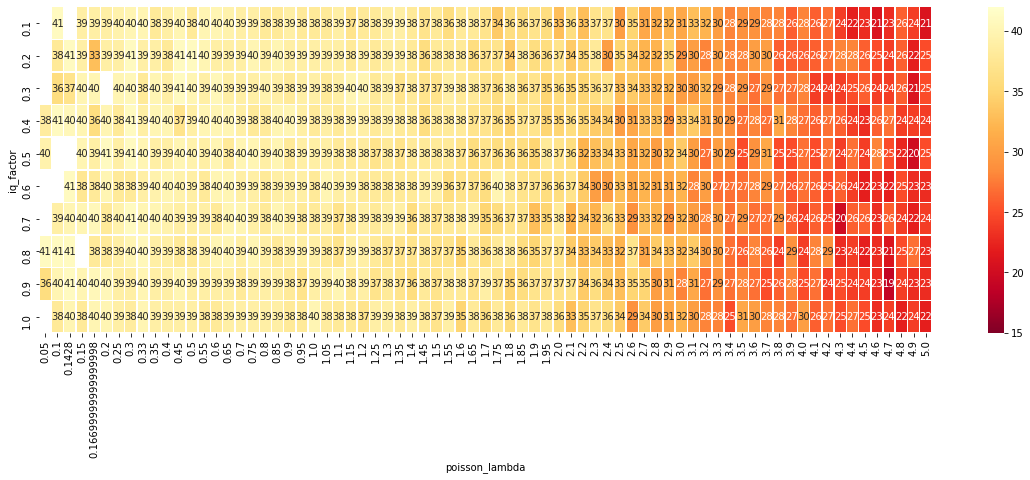

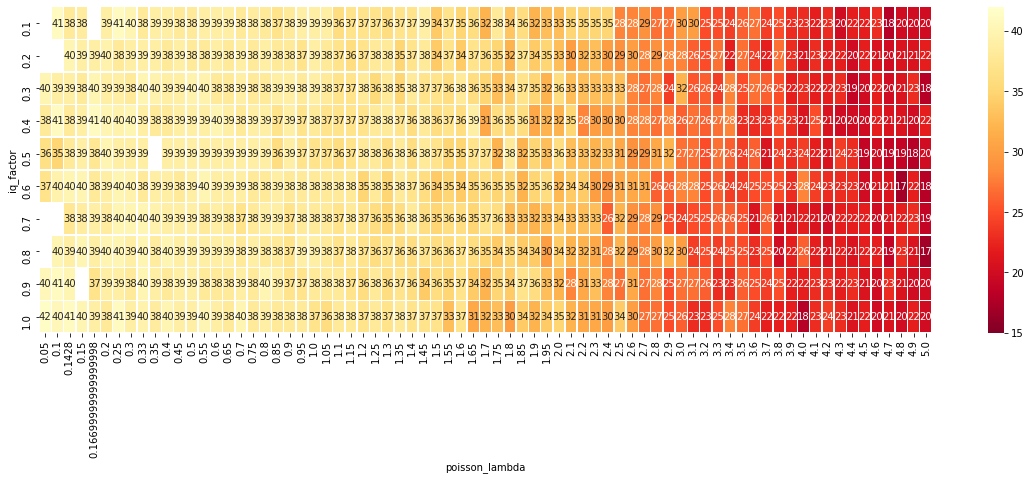

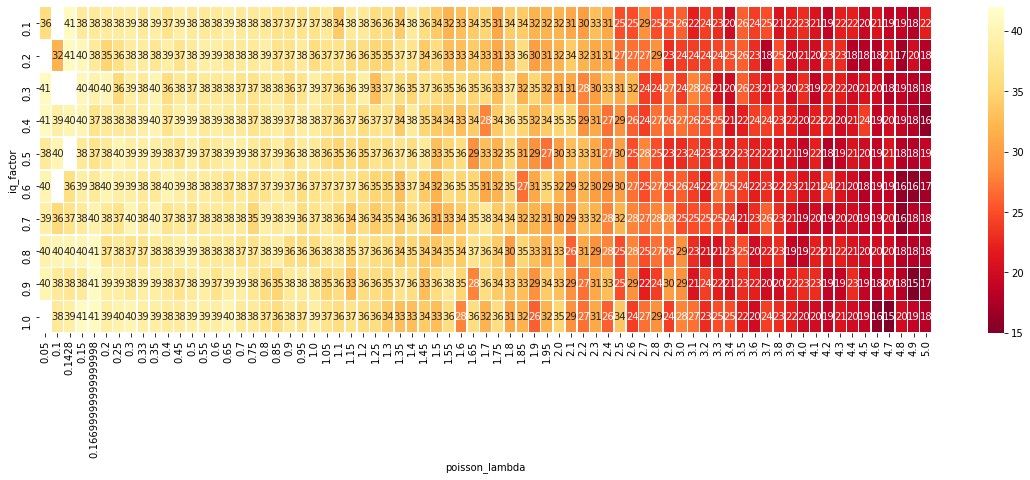

In [10]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(20, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlOrRd_r", vmin=15, vmax=42)

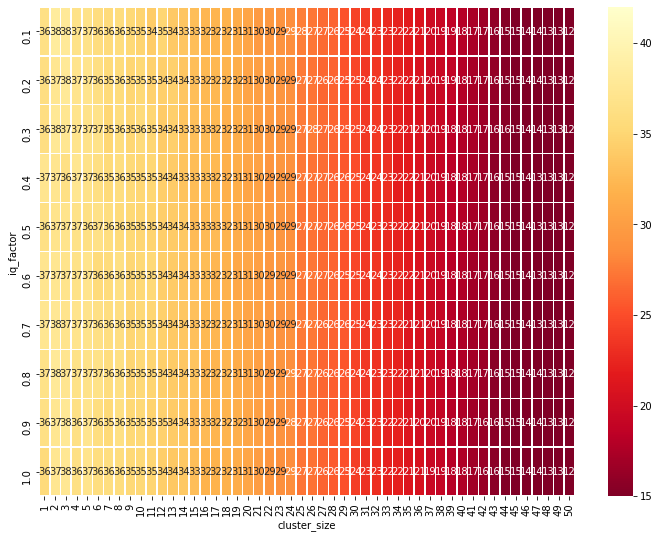

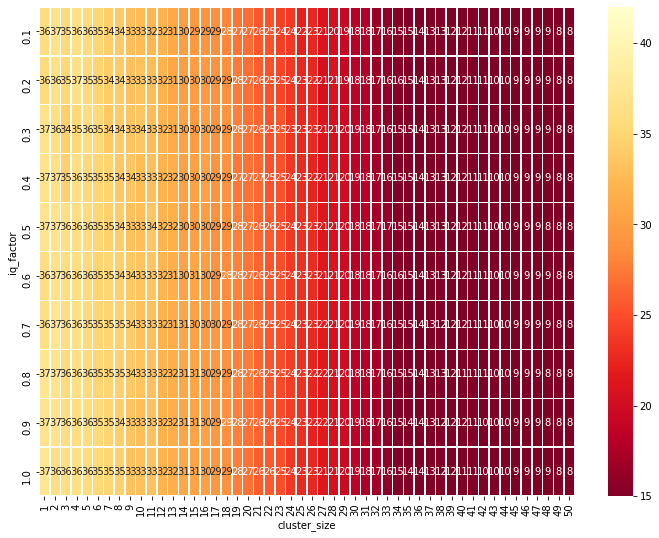

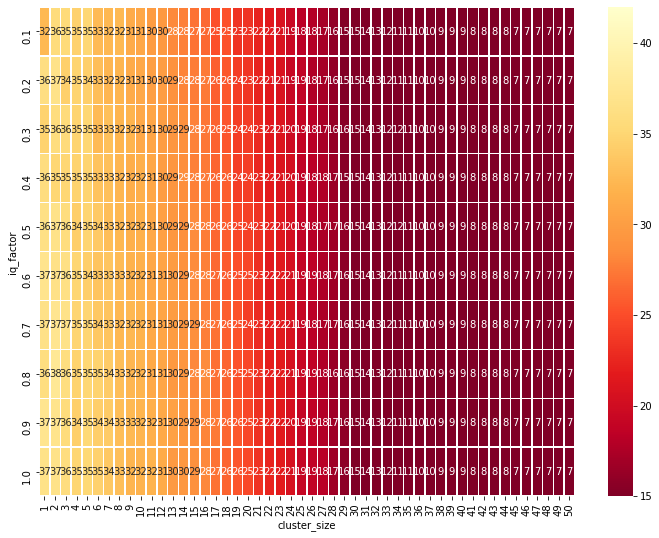

In [13]:
df1 = dfcloz_6260[["iq_factor", "outbreak_day_av", "cluster_size"]]
df2 = dfcloz_4160[["iq_factor", "outbreak_day_av", "cluster_size"]]
df3 = dfcloz_8360[["iq_factor", "outbreak_day_av", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_day_av")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_day_av")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_day_av")

for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlOrRd_r", vmin=15, vmax=42)


In [14]:
df1 = dfcluk_6260[["iq_factor", "outbreak_day_av", "cluster_size"]]
df2 = dfcluk_4160[["iq_factor", "outbreak_day_av", "cluster_size"]]
df3 = dfcluk_8360[["iq_factor", "outbreak_day_av", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_day_av")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_day_av")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_day_av")

for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlOrRd_r", vmin=15, vmax=42)

NameError: name 'dfcluk_6260' is not defined

In [22]:
dfpluk_6260 = df_pluk[df_pluk["num_tests"] == 6260]
dfpluk_4160 = df_pluk[df_pluk["num_tests"] == 4160]
dfpluk_8360 = df_pluk[df_pluk["num_tests"] == 8360]

df1 = dfploz_6260[["iq_factor", "outbreak_day_md", "poisson_lambda"]]
df2 = dfploz_4160[["iq_factor", "outbreak_day_md", "poisson_lambda"]]
df3 = dfploz_8360[["iq_factor", "outbreak_day_md", "poisson_lambda"]]

df1_map = df1.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")
df2_map = df2.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")
df3_map = df3.pivot("iq_factor", "poisson_lambda", "outbreak_day_md")


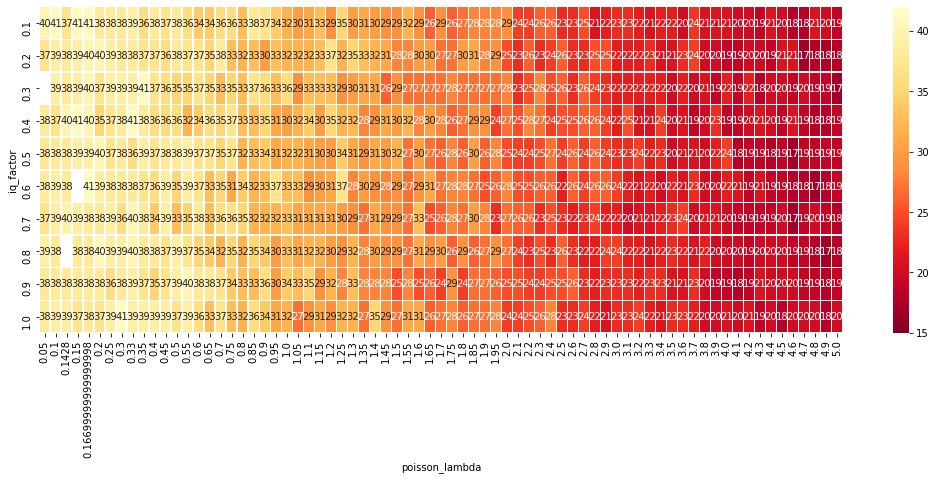

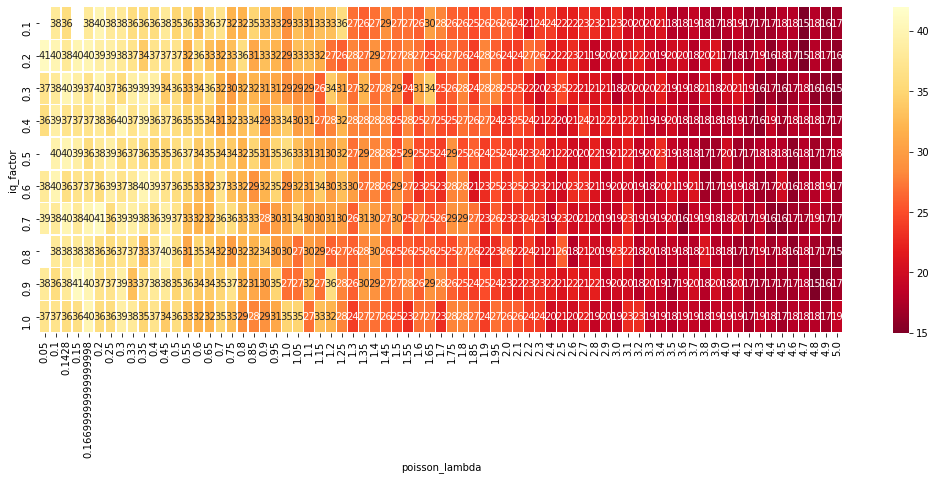

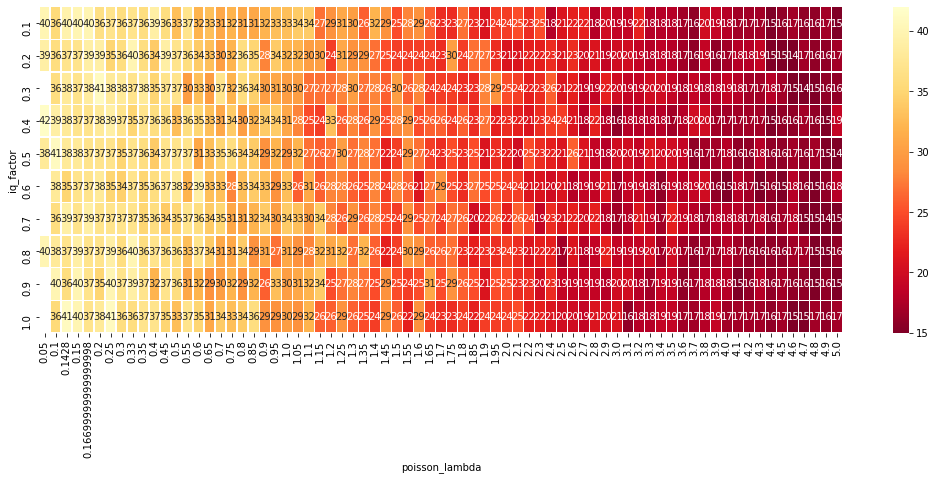

In [23]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 6))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlOrRd_r", vmin=15, vmax=42)

In [15]:
df1 = dfploz_6260[["iq_factor", "outbreak_prob", "poisson_lambda"]]
df2 = dfploz_4160[["iq_factor", "outbreak_prob", "poisson_lambda"]]
df3 = dfploz_8360[["iq_factor", "outbreak_prob", "poisson_lambda"]]

df1_map = df1.pivot("iq_factor", "poisson_lambda", "outbreak_prob")
df2_map = df2.pivot("iq_factor", "poisson_lambda", "outbreak_prob")
df3_map = df3.pivot("iq_factor", "poisson_lambda", "outbreak_prob")


In [16]:
df1_map

poisson_lambda,0.0500,0.1000,0.1428,0.1500,0.1670,0.2000,0.2500,0.3000,0.3300,0.3500,...,4.1000,4.2000,4.3000,4.4000,4.5000,4.6000,4.7000,4.8000,4.9000,5.0000
iq_factor,,,,,,,,,,,,,,,,,,,,,
0.1,0.0,0.4,1.3,1.4,0.0,1.7,0.7,3.3,1.3,2.9,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.2,0.0,0.0,0.9,0.5,2.3,0.8,1.1,6.0,3.0,4.2,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.3,0.6,1.1,0.4,0.8,0.5,0.5,3.0,3.2,1.9,6.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.4,0.5,0.5,1.1,1.3,0.6,1.5,3.4,2.0,2.8,1.7,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.5,1.2,0.3,3.2,2.3,0.2,2.9,5.6,3.0,2.5,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.6,1.4,1.2,1.3,0.5,0.9,2.9,3.4,4.0,3.4,2.4,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.7,0.0,0.0,2.4,0.8,0.4,1.0,1.1,3.9,0.7,4.8,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.8,0.0,2.5,7.6,1.4,7.0,0.8,4.1,3.1,5.4,2.8,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
0.9,0.4,0.3,2.5,0.0,2.1,4.2,2.4,9.8,7.2,6.9,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


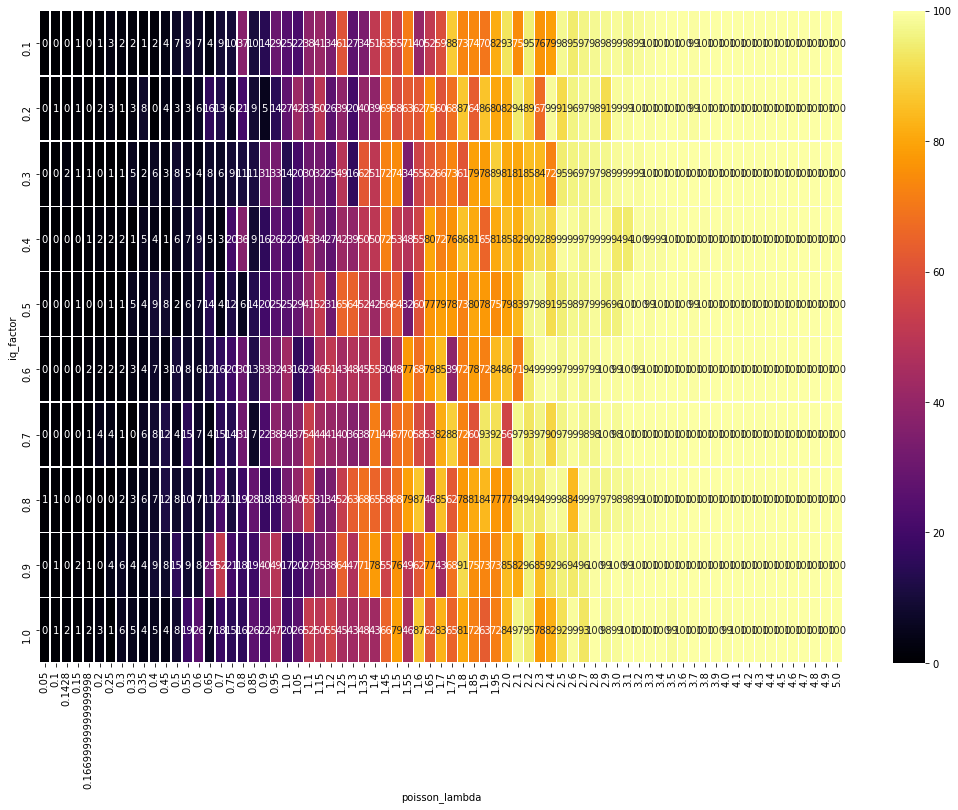

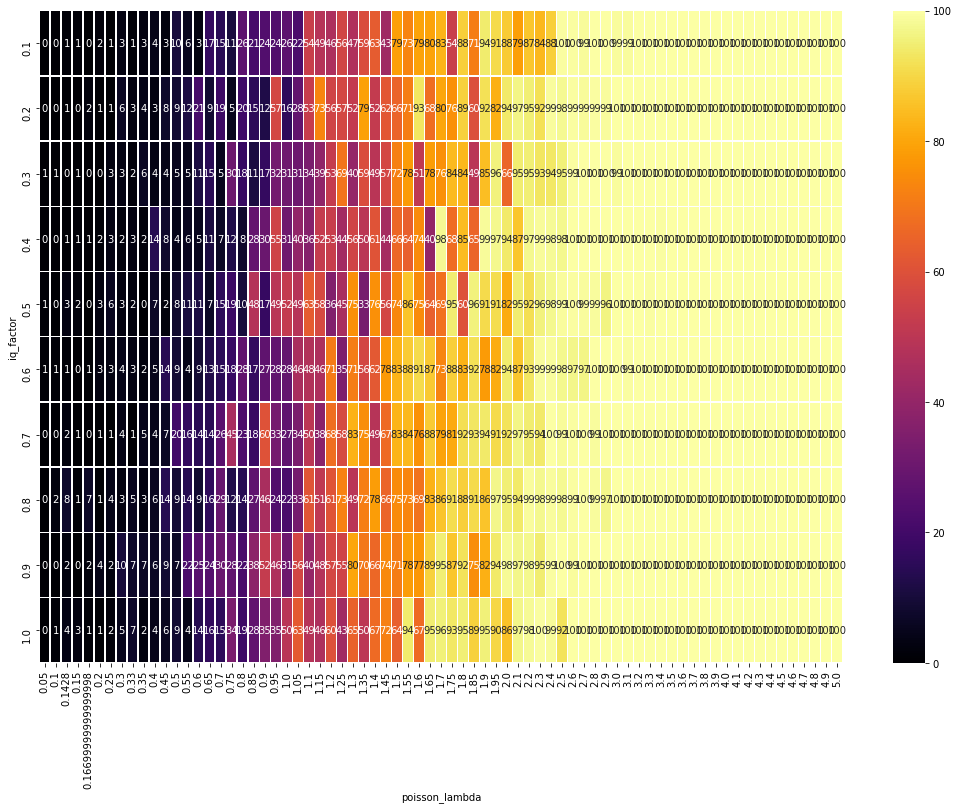

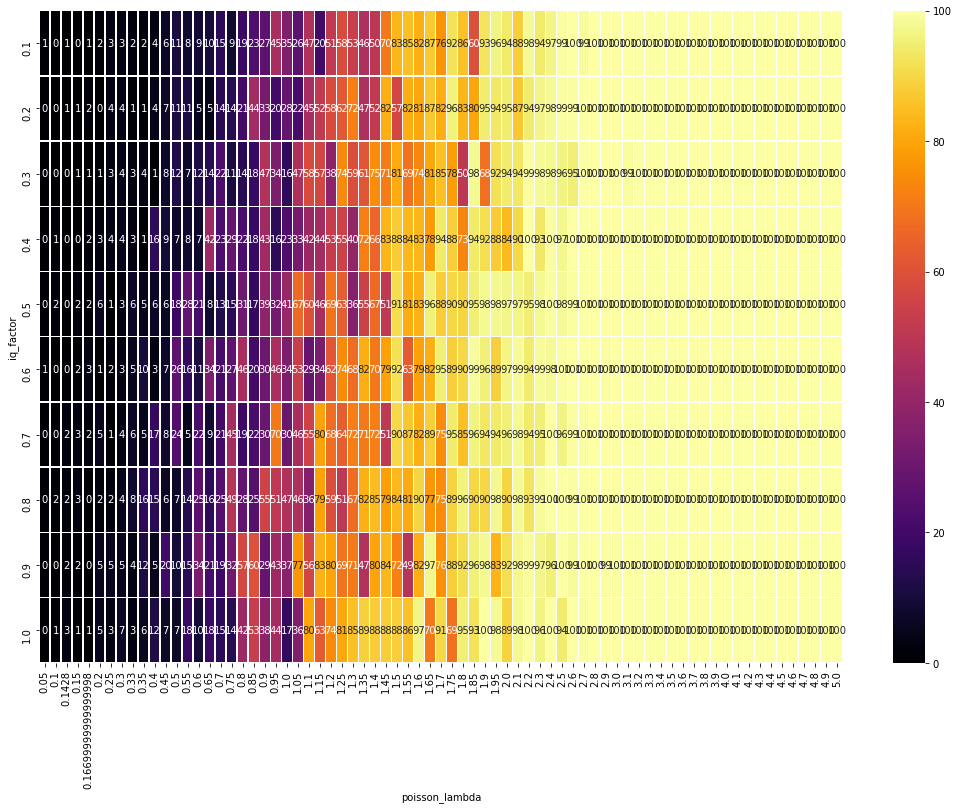

In [74]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 12))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="inferno", vmin=0, vmax=100)

In [19]:
sns.set(font_scale=1.4)

In [81]:
df1 = dfcloz_6260[["iq_factor", "outbreak_prob", "cluster_size"]]
df2 = dfcloz_4160[["iq_factor", "outbreak_prob", "cluster_size"]]
df3 = dfcloz_8360[["iq_factor", "outbreak_prob", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_prob")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_prob")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_prob")


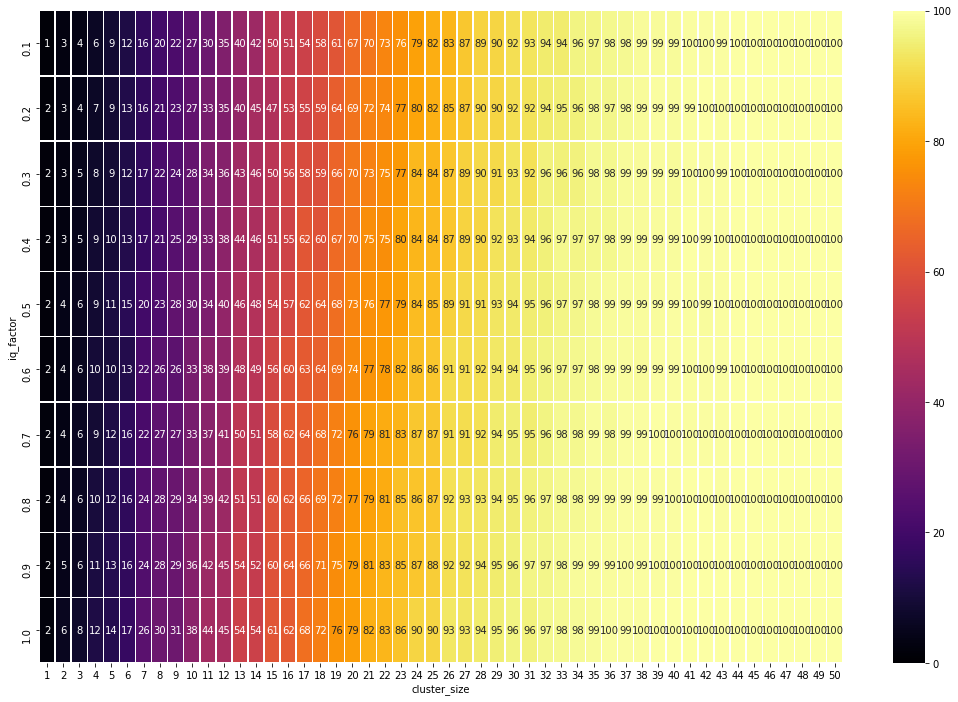

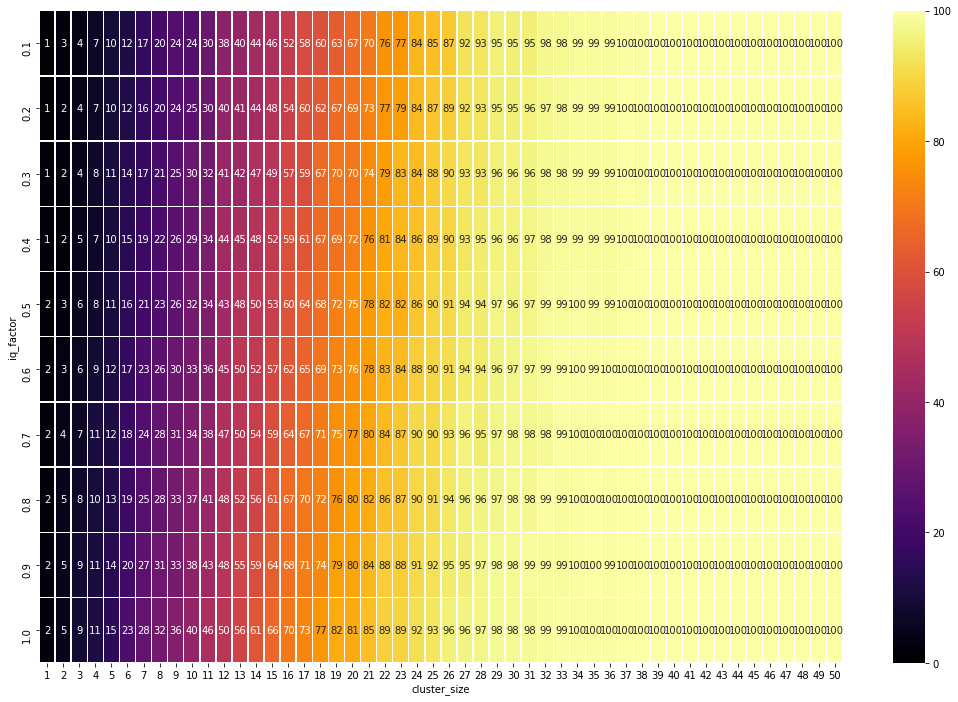

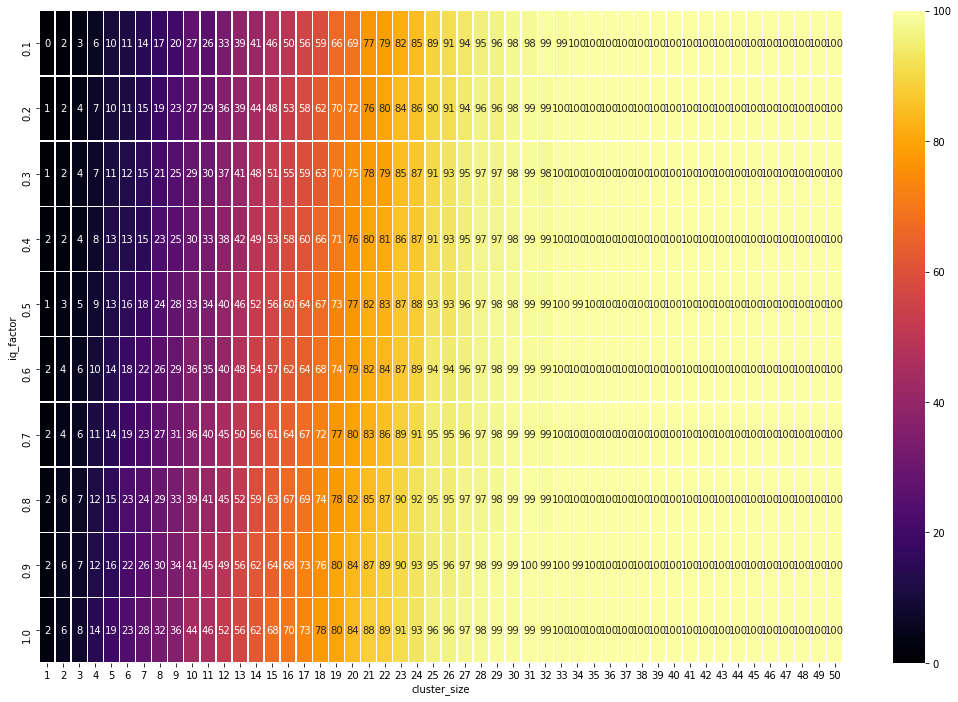

In [82]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(18, 12))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="inferno", vmin=0, vmax=100)

In [17]:
dfcloz_6260 = df_cloz[df_cloz["num_tests"] == 6260]
dfcloz_4160 = df_cloz[df_cloz["num_tests"] == 4160]
dfcloz_8360 = df_cloz[df_cloz["num_tests"] == 8360]

dfcloz_6260 = dfcloz_6260[dfcloz_6260["cluster_size"] <=15]
dfcloz_4160 = dfcloz_4160[dfcloz_4160["cluster_size"] <=15]
dfcloz_8360 = dfcloz_8360[dfcloz_8360["cluster_size"] <=15]


df1 = dfcloz_6260[["iq_factor", "outbreak_prob", "cluster_size"]]
df2 = dfcloz_4160[["iq_factor", "outbreak_prob", "cluster_size"]]
df3 = dfcloz_8360[["iq_factor", "outbreak_prob", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_prob")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_prob")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_prob")

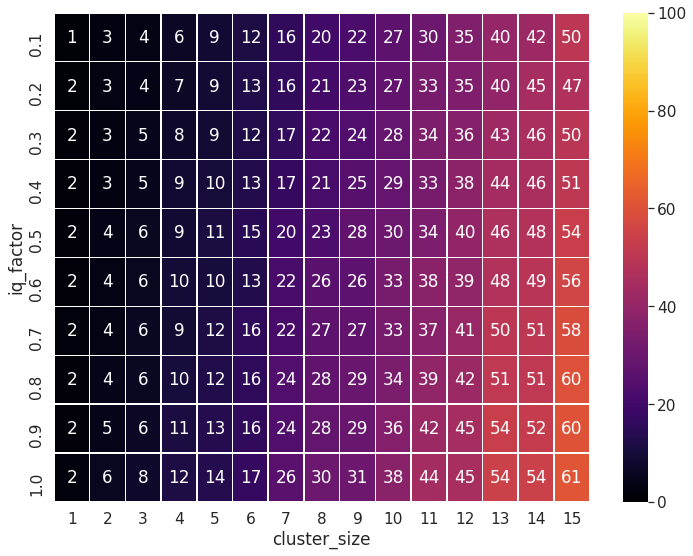

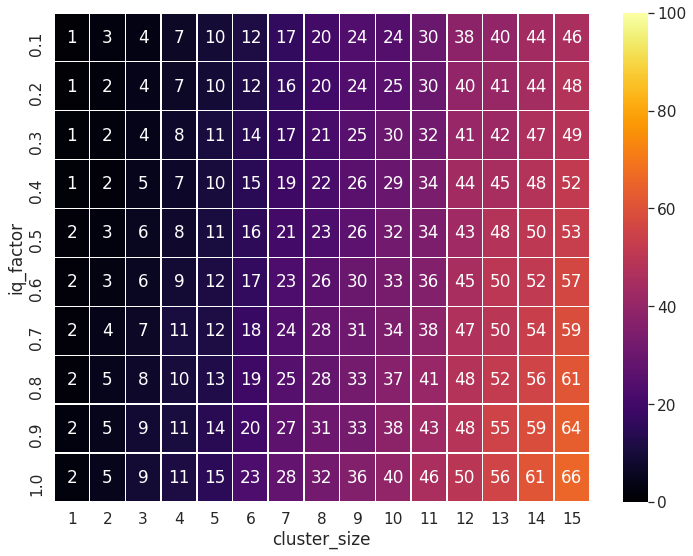

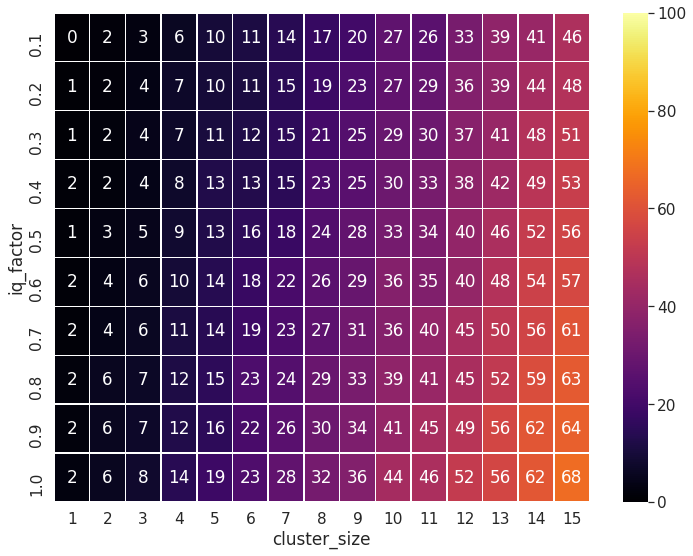

In [20]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="inferno", vmin=0, vmax=100)

In [21]:
dfcluk_6260 = df_cluk[df_cluk["num_tests"] == 6260]
dfcluk_4160 = df_cluk[df_cluk["num_tests"] == 4160]
dfcluk_8360 = df_cluk[df_cluk["num_tests"] == 8360]

dfcluk_6260 = dfcluk_6260[dfcluk_6260["cluster_size"] <=15]
dfcluk_4160 = dfcluk_4160[dfcluk_4160["cluster_size"] <=15]
dfcluk_8360 = dfcluk_8360[dfcluk_8360["cluster_size"] <=15]


df1 = dfcluk_6260[["iq_factor", "outbreak_prob", "cluster_size"]]
df2 = dfcluk_4160[["iq_factor", "outbreak_prob", "cluster_size"]]
df3 = dfcluk_8360[["iq_factor", "outbreak_prob", "cluster_size"]]

df1_map = df1.pivot("iq_factor", "cluster_size", "outbreak_prob")
df2_map = df2.pivot("iq_factor", "cluster_size", "outbreak_prob")
df3_map = df3.pivot("iq_factor", "cluster_size", "outbreak_prob")


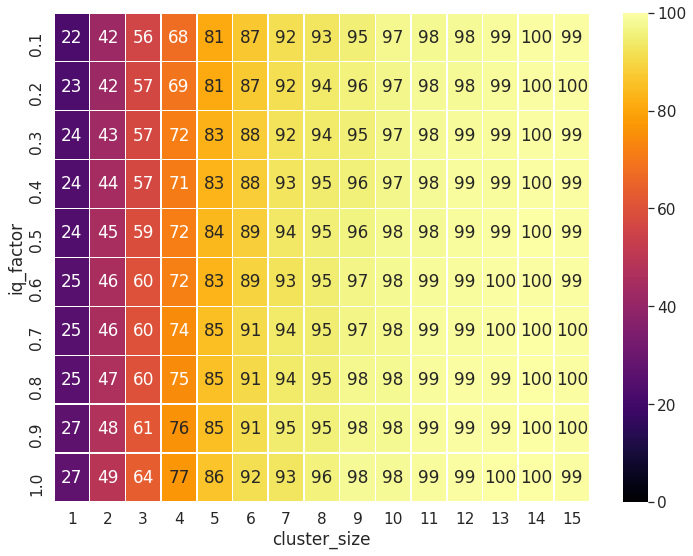

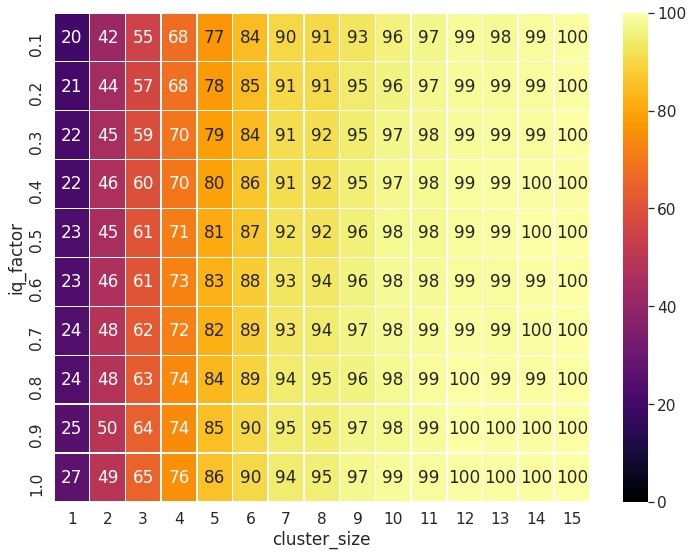

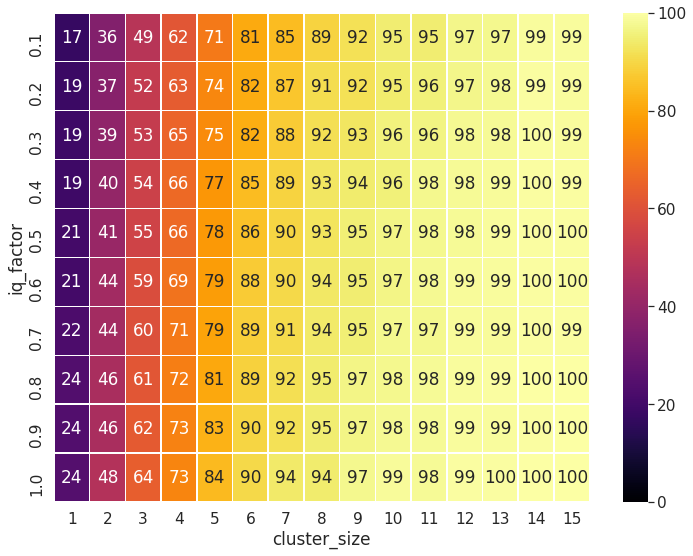

In [22]:
for df_map in [df2_map, df1_map, df3_map]:
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(df_map, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="inferno", vmin=0, vmax=100)

In [55]:
dfcloz_4160 = dfcloz_4160[dfcloz_4160["cluster_size"] <=40]

In [70]:
dfploz_4160_iq_low = dfploz_4160[dfploz_4160["iq_factor"]==0.5]

In [72]:
dfcloz_4160_iq_low = dfcloz_4160[dfcloz_4160["iq_factor"]==0.5]

In [37]:
dfpluk_4160_iq_low = dfpluk_4160[dfpluk_4160["iq_factor"]==0.5]

In [27]:
dfpluk_4160_iq_low

,outbreak,outbreak_day,outbreak_day_av,outbreak_day_md,outbreak_day_sd,outbreak_prob,control_prob,contained_prob,first_case_day,first_case_day_av,...,first_case_inf,first_case_inf_av,first_case_inf_md,first_case_inf_sd,iq_factor,cluster_size,poisson_lambda,num_tests,label,beta
1022,False,NaN,35.944444,37.5,5.293460,12.6,87.3,0.1,NaN,27.268493,...,NaN,27.268493,26.0,9.522819,0.5,0,0.0500,4160,distributed,0.0192
1023,False,NaN,37.555556,38.0,3.649332,9.9,89.7,0.4,NaN,31.440389,...,NaN,31.440389,33.0,8.144272,0.5,0,0.1000,4160,distributed,0.0192
1024,False,NaN,37.610169,38.0,3.386248,23.6,75.9,0.5,39.0,27.327988,...,6.666667,27.327988,26.5,6.987619,0.5,0,0.1428,4160,distributed,0.0192
1025,False,NaN,38.032895,39.0,3.763428,15.2,84.4,0.4,41.0,30.331852,...,6.333333,30.331852,31.0,7.097382,0.5,0,0.1500,4160,distributed,0.0192
1026,False,NaN,38.209677,39.0,3.420230,12.4,86.9,0.7,NaN,29.883946,...,NaN,29.883946,30.0,6.855660,0.5,0,0.1670,4160,distributed,0.0192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,True,17.0,17.333000,17.0,2.142454,100.0,0.0,0.0,7.0,7.285000,...,14.166667,7.285000,7.0,1.601179,0.5,0,4.6000,4160,distributed,0.0192
1091,True,19.0,19.073000,19.0,2.285098,100.0,0.0,0.0,8.0,7.825000,...,11.333333,7.825000,8.0,1.645714,0.5,0,4.7000,4160,distributed,0.0192
1092,True,19.0,19.367000,19.0,2.296587,100.0,0.0,0.0,9.0,8.412000,...,14.000000,8.412000,8.0,1.825447,0.5,0,4.8000,4160,distributed,0.0192
1093,True,19.0,18.997000,19.0,2.255879,100.0,0.0,0.0,9.0,8.132000,...,14.000000,8.132000,8.0,1.718306,0.5,0,4.9000,4160,distributed,0.0192


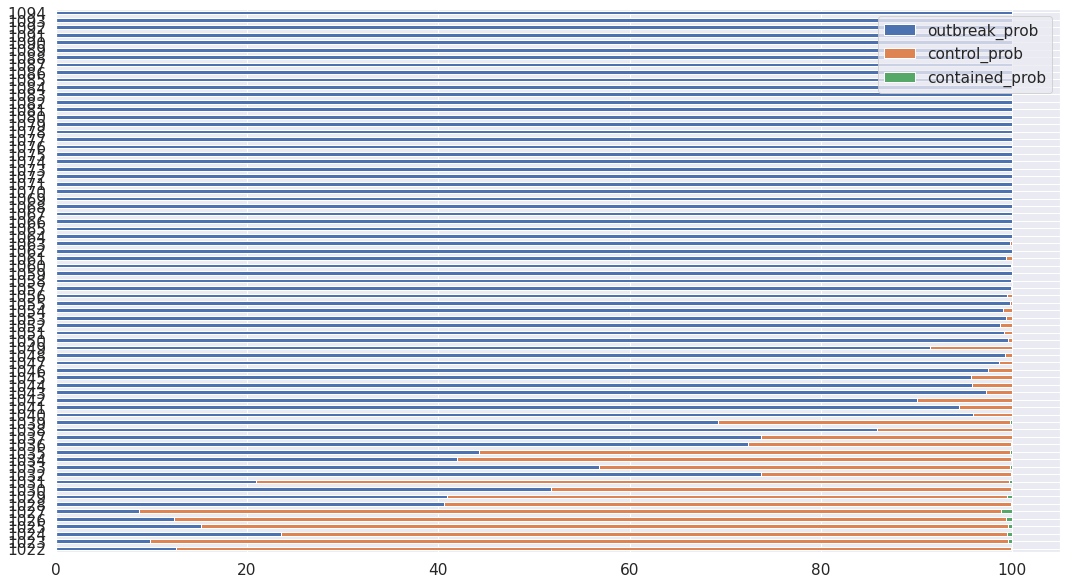

In [28]:
f, ax = plt.subplots(figsize=(18, 10))
tick_label = [f'{label:.4f}' for label in dfpluk_4160_iq_low["poisson_lambda"]]
dfpluk_4160_iq_low.plot.barh(y=["outbreak_prob", "control_prob", "contained_prob"],stacked=True, ax=ax, tick_label=tick_label)

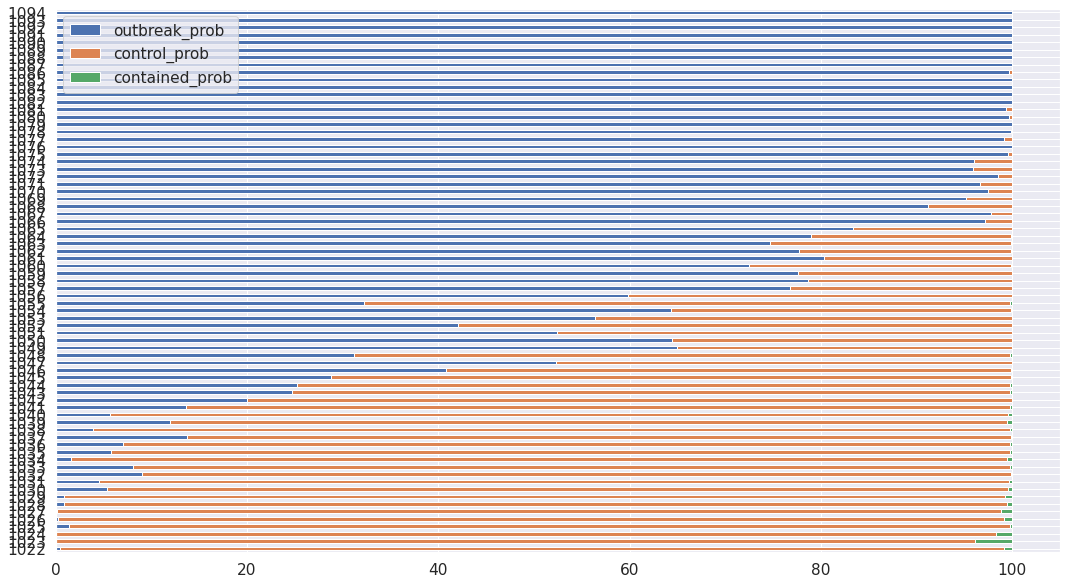

In [29]:
f, ax = plt.subplots(figsize=(18, 10))
tick_label = [f'{label:.4f}' for label in dfploz_4160_iq_low["poisson_lambda"]]
dfploz_4160_iq_low.plot.barh(y=["outbreak_prob", "control_prob", "contained_prob"],stacked=True, ax=ax, tick_label=tick_label)

In [46]:
dfploz_4160_iq_low

,outbreak,outbreak_day,outbreak_day_av,outbreak_day_md,outbreak_day_sd,outbreak_prob,control_prob,contained_prob,first_case_day,first_case_day_av,...,first_case_inf,first_case_inf_av,first_case_inf_md,first_case_inf_sd,iq_factor,cluster_size,poisson_lambda,num_tests,label,beta
1022,False,NaN,38.000000,39.5,3.674235,0.4,98.7,0.9,NaN,32.776000,...,NaN,32.776000,33.0,6.432663,0.5,0,0.0500,4160,distributed,0.011293
1023,False,NaN,NaN,NaN,NaN,0.0,96.1,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,0.5,0,0.1000,4160,distributed,0.011293
1024,False,NaN,NaN,NaN,NaN,0.0,98.3,1.7,NaN,36.368932,...,NaN,36.368932,37.0,4.485122,0.5,0,0.1428,4160,distributed,0.011293
1025,False,NaN,38.142857,40.0,3.356383,1.4,98.4,0.2,NaN,32.782534,...,NaN,32.782534,36.0,8.128398,0.5,0,0.1500,4160,distributed,0.011293
1026,False,NaN,39.000000,39.0,1.000000,0.2,98.9,0.9,NaN,33.196347,...,NaN,33.196347,34.0,6.048720,0.5,0,0.1670,4160,distributed,0.011293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,True,28.0,28.043000,28.0,3.850604,100.0,0.0,0.0,11.0,9.910000,...,8.666667,9.910000,10.0,2.315146,0.5,0,4.6000,4160,distributed,0.011293
1091,True,25.0,24.945000,25.0,4.022931,100.0,0.0,0.0,9.0,8.884000,...,10.000000,8.884000,9.0,1.690723,0.5,0,4.7000,4160,distributed,0.011293
1092,True,22.0,22.777000,22.5,3.359356,100.0,0.0,0.0,8.0,7.787000,...,8.333333,7.787000,8.0,1.854624,0.5,0,4.8000,4160,distributed,0.011293
1093,True,20.0,20.589000,20.0,3.348146,100.0,0.0,0.0,8.0,7.334000,...,13.333333,7.334000,7.0,1.535723,0.5,0,4.9000,4160,distributed,0.011293


In [42]:
dfcloz_4160_iq_low

,outbreak,outbreak_day,outbreak_day_av,outbreak_day_md,outbreak_day_sd,outbreak_prob,control_prob,contained_prob,first_case_day,first_case_day_av,...,first_case_inf,first_case_inf_av,first_case_inf_md,first_case_inf_sd,iq_factor,cluster_size,poisson_lambda,num_tests,label,beta
700,False,NaN,36.470588,38.0,4.353736,1.7,98.1,0.2,NaN,24.871795,...,NaN,24.871795,24.5,8.153483,0.5,1,0,4160,cluster,0.011293
701,False,NaN,36.975000,38.0,4.524862,4.0,95.8,0.2,NaN,20.901075,...,NaN,20.901075,20.0,8.536254,0.5,2,0,4160,cluster,0.011293
702,False,NaN,37.036364,37.0,3.741481,5.5,94.4,0.1,NaN,17.760997,...,NaN,17.760997,16.0,8.694391,0.5,3,0,4160,cluster,0.011293
703,False,NaN,36.795455,38.0,4.065261,8.8,91.1,0.1,NaN,15.470517,...,NaN,15.470517,13.0,8.000228,0.5,4,0,4160,cluster,0.011293
704,False,NaN,36.336364,37.0,4.456410,11.0,88.9,0.1,42.0,13.087100,...,3.333333,13.087100,11.0,7.173862,0.5,5,0,4160,cluster,0.011293
705,False,NaN,36.612245,38.0,4.698312,14.7,85.2,0.1,29.0,11.581837,...,3.000000,11.581837,10.0,6.143687,0.5,6,0,4160,cluster,0.011293
706,False,NaN,36.039801,37.0,4.413729,20.1,79.8,0.1,22.0,9.855828,...,3.000000,9.855828,9.0,4.841102,0.5,7,0,4160,cluster,0.011293
707,False,NaN,35.617391,37.0,4.819494,23.0,76.9,0.1,17.0,8.991944,...,3.333333,8.991944,8.0,4.442985,0.5,8,0,4160,cluster,0.011293
708,False,NaN,35.228261,36.5,5.398812,27.6,72.3,0.1,10.0,8.171859,...,3.166667,8.171859,8.0,3.278315,0.5,9,0,4160,cluster,0.011293
709,False,NaN,35.009934,36.0,5.237717,30.2,69.8,0.0,9.0,7.419000,...,3.333333,7.419000,7.0,3.430953,0.5,10,0,4160,cluster,0.011293


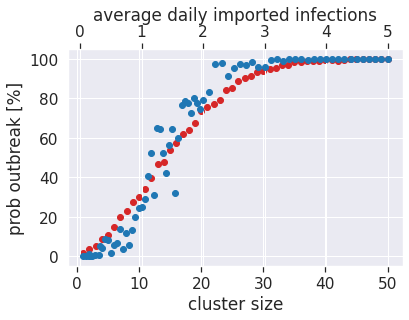

In [73]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('cluster size')
ax1.set_ylabel('prob outbreak [%]')
ax1.scatter(dfcloz_4160_iq_low["cluster_size"],dfcloz_4160_iq_low["outbreak_prob"], color=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis

ax2.set_xlabel('average daily imported infections')
color = 'tab:blue'
ax2.scatter(dfploz_4160_iq_low["poisson_lambda"],dfploz_4160_iq_low["outbreak_prob"], color=color)
#ax2.tick_params(axis='y', labelcolor=color)


In [30]:
arr1 = df1_map.values.T

(0.0, 25.0)

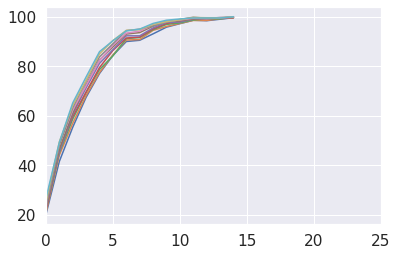

In [31]:
plt.plot(arr1)
plt.xlim([0, 25])

(0.0, 25.0)

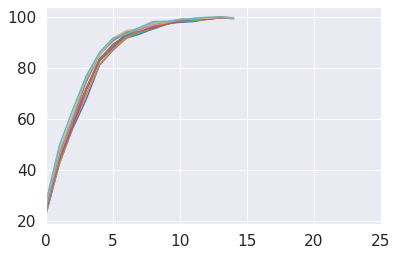

In [32]:
arr2 = df2_map.values.T
plt.plot(arr2)
plt.xlim([0, 25])

(0.0, 25.0)

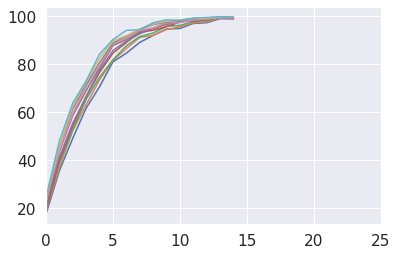

In [33]:
arr3 = df3_map.values.T
plt.plot(arr3)
plt.xlim([0, 25])

(0.0, 15.0)

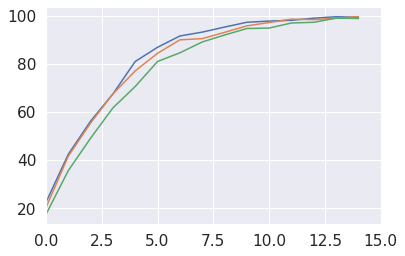

In [34]:
plt.plot(arr2[:, 0])
plt.plot(arr1[:, 0])
plt.plot(arr3[:, 0])
plt.xlim([0, 15])

In [78]:
num_tests = 6260
iq_factor = 0.5

dfploz = df_ploz[(df_ploz["num_tests"] == num_tests) & (df_ploz["iq_factor"] == iq_factor)]


In [80]:
dfploz[["beta", "num_tests"]].values.shape

(73, 2)